In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
retail_data = pd.read_csv("sale.csv")
retail_data.head()

,Unnamed: 0,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept,Date
0,0,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,1,False,False,1,0,0,19213.485088,2010-02-05
1,1,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,2,False,False,1,0,0,43607.020113,2010-02-05
2,2,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,3,False,False,1,0,0,11793.698516,2010-02-05
3,3,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,4,False,False,1,0,0,25974.630238,2010-02-05
4,4,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,5,False,False,1,0,0,21365.583515,2010-02-05


In [3]:
retail_data.drop(['Unnamed: 0'], axis=1, inplace=True) 

## Modeling 

Time series analysis:

Any data recorded with some fixed interval of time is called as time series data. This fixed interval can be hourly, daily, monthly or yearly. 

In time series data, time will always be independent variable and there can be one or many dependent variable.

Objective of time series analysis is to understand how change in time affect the dependent variables and accordingly predict values for future time intervals.

In [4]:
retail_data.dtypes

Weekly_Sales              float64
Size                      float64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
Month                     float64
AvgWeeklySalesperStore    float64
AverageMonthlySales       float64
Store                       int64
Dept                        int64
IsHoliday_x                  bool
IsHoliday_y                  bool
Type_A                      int64
Type_B                      int64
Type_C                      int64
AvgWeeklySalesperDept     float64
Date                       object
dtype: object

In [5]:
retail_data['Date']= pd.to_datetime(retail_data['Date'])
retail_data.set_index('Date', inplace=True)

In [6]:
retail_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


In [7]:
Time_Seriesdata= retail_data[['AvgWeeklySalesperDept']]

In [8]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,19213.485088
2010-02-05,43607.020113
2010-02-05,11793.698516
2010-02-05,25974.630238
2010-02-05,21365.583515


In [9]:
y= Time_Seriesdata.AvgWeeklySalesperDept

<Axes: xlabel='Date'>

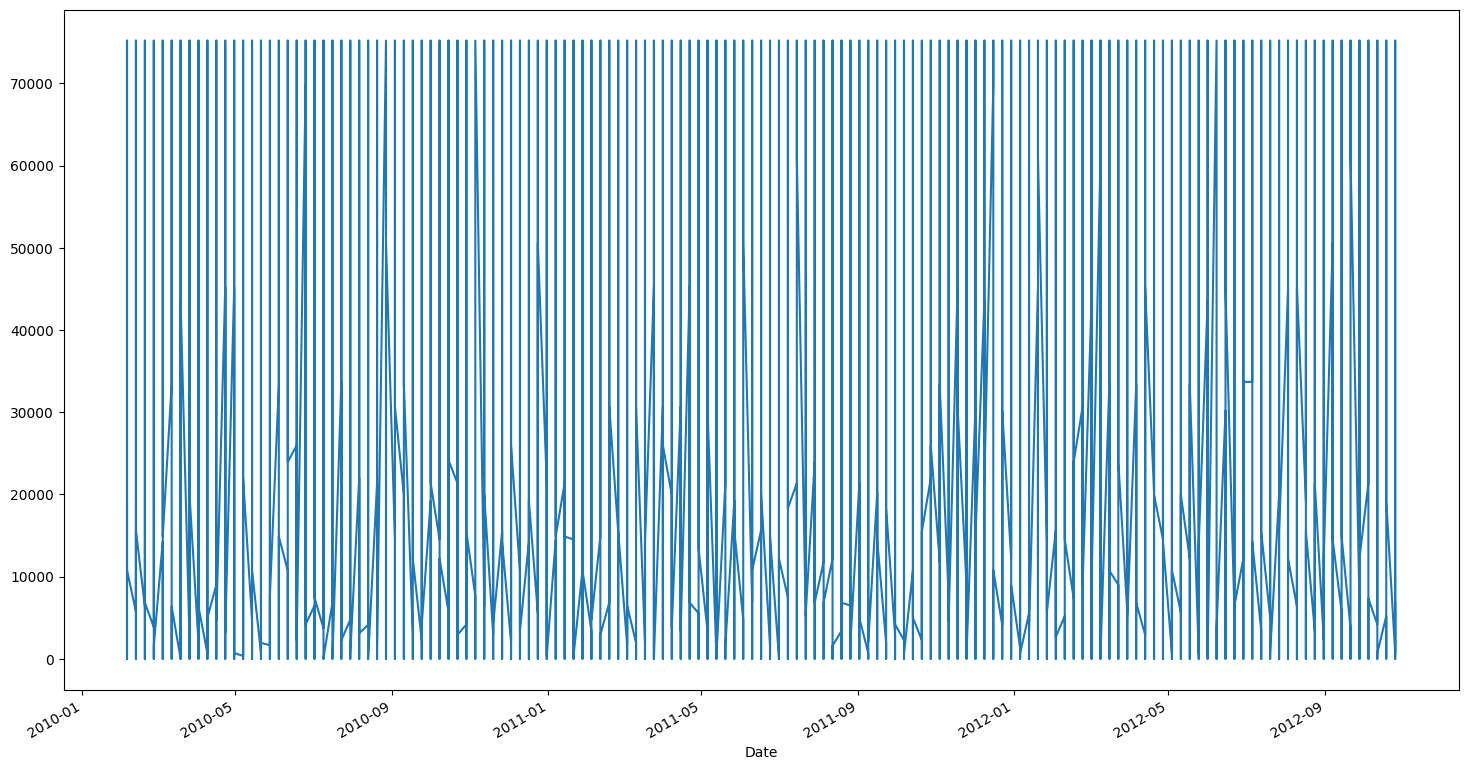

In [10]:
plt.figure(figsize=(18,10))
y.plot()

We can notice from the plot of y, that y has lot of overlapping data. It represents overall Weekly Sales(per department, per store, per week etc). So let's group it by date, and predict the Department-wise sales for the following year.

In [11]:
Time_Seriesdata= Time_Seriesdata.groupby('Date').sum()

In [12]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,4.680998e+07
2010-02-12,4.695113e+07
2010-02-19,4.712124e+07
2010-02-26,4.681797e+07
2010-03-05,4.671044e+07


In [13]:
y= Time_Seriesdata.AvgWeeklySalesperDept

<Axes: xlabel='Date'>

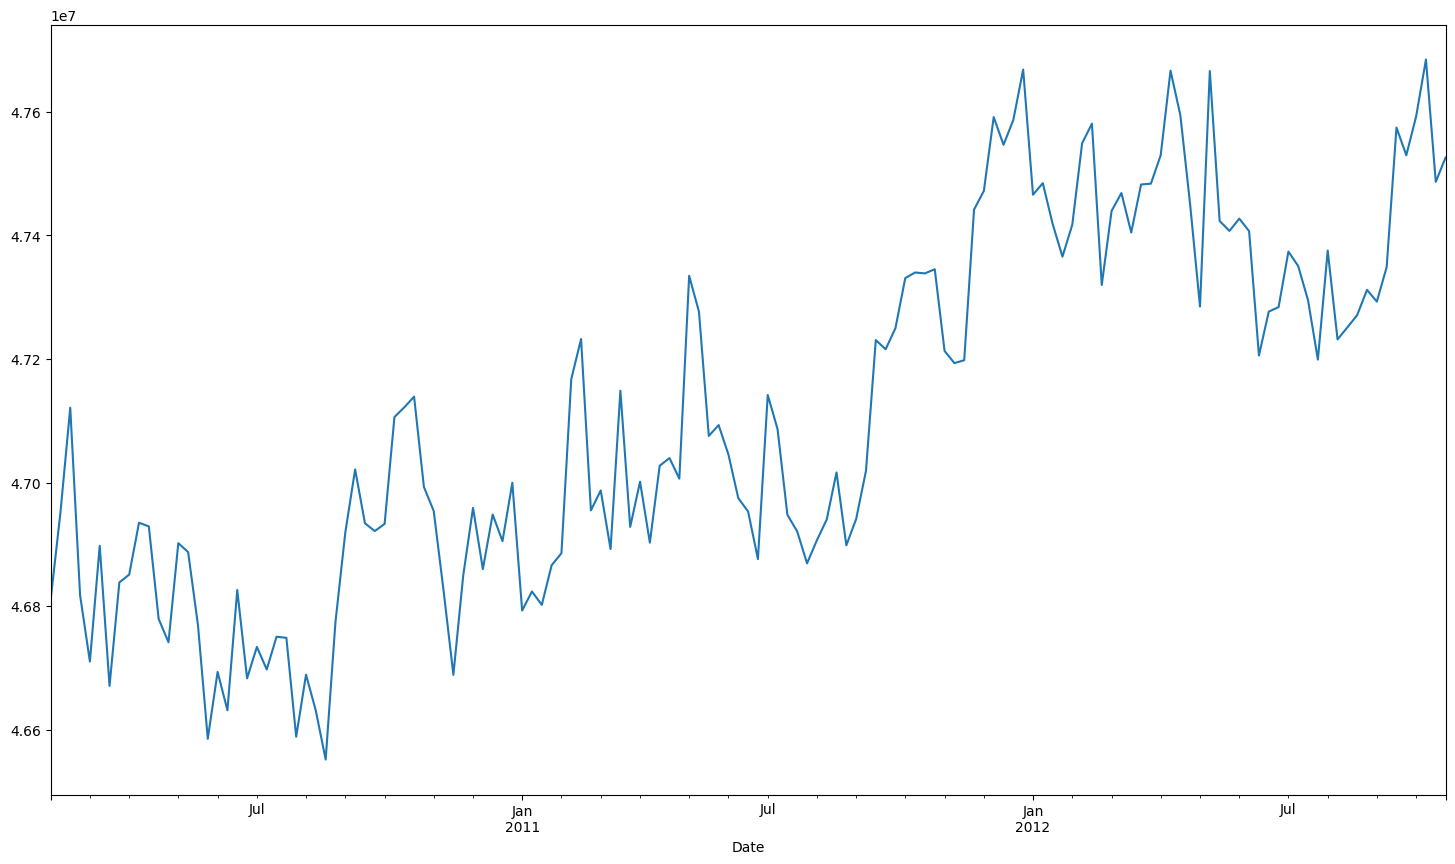

In [14]:
plt.figure(figsize=(18,10))
y.plot()

The graph looks pretty clean now. No overlapping data. Our plot also shows seasonality. An important feature to be analyzed in a Time Series is the seasonality. We have to now decompose the data to see it's Trend, Level and Noise.

## Decomposition

# Trend 

Trend represent the change in dependent variables with respect to time from start to end. In case of increasing trend dependent variable will increase with time and vice versa. It's not necessary to have definite trend in time series, we can have a single time series with increasing and decreasing trend. In short trend represent the varying mean of time series data.

# Seasonality 

If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events.

# Irregularities 

This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc.

In [15]:
#resample the data (per month)
y = Time_Seriesdata['AvgWeeklySalesperDept'].resample('M').sum()

In [16]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decomposition= seasonal_decompose(y)

<Figure size 640x480 with 0 Axes>

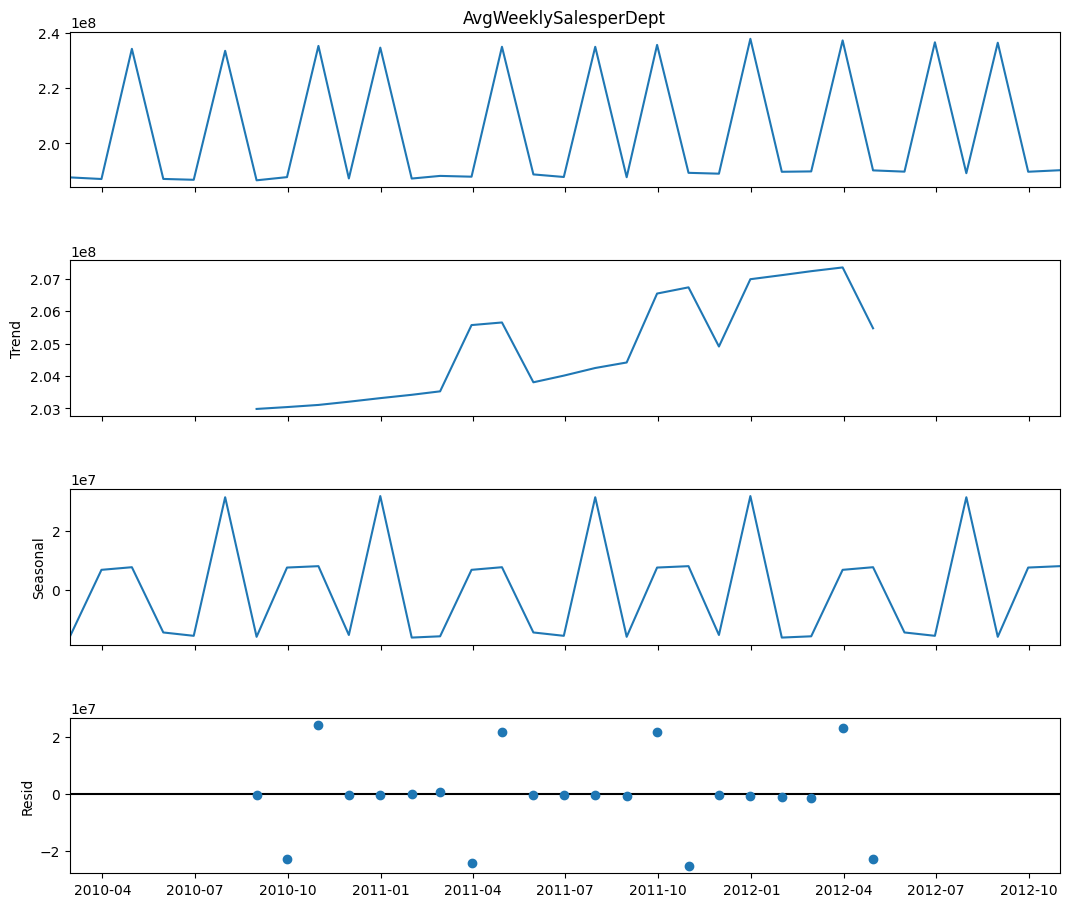

In [18]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

## Stationarity

For accurate analysis and forecasting trend and seasonality is removed from the time series and converted it into stationary series. 

Time series data is said to be stationary when statistical properties like mean, standard deviation are constant and there is no seasonality. 

In other words statistical properties of the time series data should not be a function of time.

Test for stationarity:

KPSS test:

p-value > 0.05: stationary.

p-value <= 0.05: non-stationary.

ADF test:

p-value > 0.05: non-stationary.

p-value <= 0.05: stationary.

In [19]:
# KPSS
from statsmodels.tsa.stattools import kpss
kpss(y,nlags="auto") 

C:\Users\MITHUNA\AppData\Local\Temp\ipykernel_16576\200318864.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y,nlags="auto")


(0.2839812571598648,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

data is stationary

In [20]:
# adfuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                -9.355249e+00
p-value                        8.092178e-16
#Lags Used                     1.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


According to Augmented Dickey-Fullet test, the p-value is 0.08, not less than 0.05 which means we accept the null hypothesis that our data is not stationary.

<Axes: xlabel='Date'>

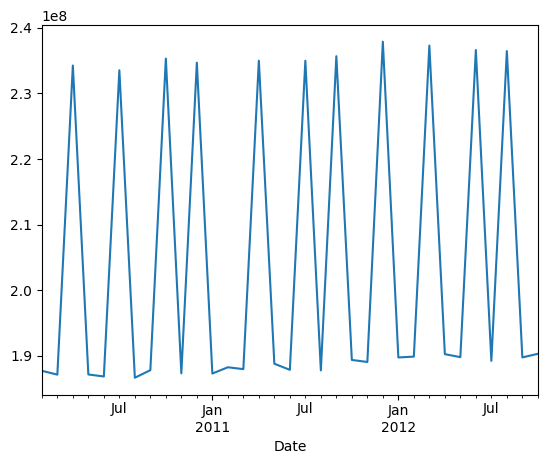

In [21]:
y.plot()

In [22]:
y_log = np.log(y)

<Axes: xlabel='Date'>

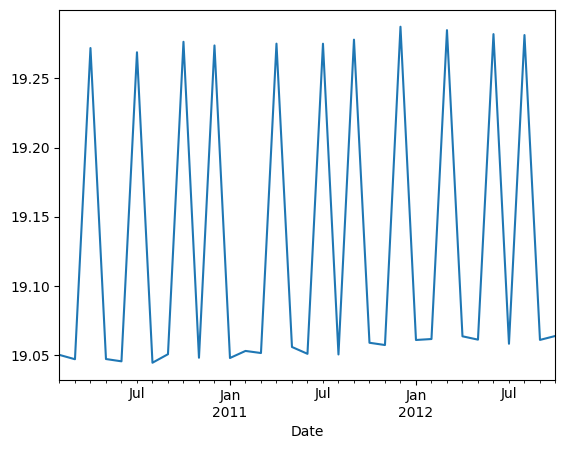

In [23]:
y_log.plot()

In [24]:
y_log_diff= y_log.diff()

In [25]:
y_log_diff

Date
2010-02-28         NaN
2010-03-31   -0.003109
2010-04-30    0.224593
2010-05-31   -0.224450
2010-06-30   -0.001657
2010-07-31    0.223043
2010-08-31   -0.224049
2010-09-30    0.006141
2010-10-31    0.225474
2010-11-30   -0.228026
2010-12-31    0.225385
2011-01-31   -0.225560
2011-02-28    0.005090
2011-03-31   -0.001509
2011-04-30    0.223278
2011-05-31   -0.218910
2011-06-30   -0.004938
2011-07-31    0.223800
2011-08-31   -0.224269
2011-09-30    0.227202
2011-10-31   -0.218753
2011-11-30   -0.001631
2011-12-31    0.229714
2012-01-31   -0.226079
2012-02-29    0.000697
2012-03-31    0.222913
2012-04-30   -0.220948
2012-05-31   -0.002415
2012-06-30    0.220499
2012-07-31   -0.223473
2012-08-31    0.222800
2012-09-30   -0.220015
2012-10-31    0.002863
Freq: M, Name: AvgWeeklySalesperDept, dtype: float64

In [26]:
#Drop all NaN values 
y_log_diff.dropna(inplace=True)

<Axes: xlabel='Date'>

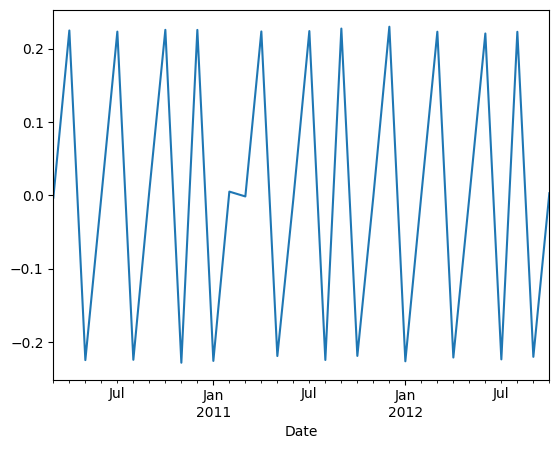

In [27]:
y_log_diff.plot()

In [28]:
kpss(y_log_diff, nlags="auto")

C:\Users\MITHUNA\AppData\Local\Temp\ipykernel_16576\3941256226.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y_log_diff, nlags="auto")


(0.2640434209124545,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

data is stationary

In [29]:
dftest = adfuller(y_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -3.627219
p-value                         0.005261
#Lags Used                      7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


Here, p-value<0.05, data is stationary.

# The ARIMA Model

In [34]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [35]:
p=0
d=0
q=2
#y_log_diff = y_log.diff().dropna()
model = ARIMA(y_log_diff, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(12)

In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     AvgWeeklySalesperDept   No. Observations:                   32
Model:                    ARIMA(0, 0, 2)   Log Likelihood                  35.722
Date:                   Thu, 09 Nov 2023   AIC                            -63.444
Time:                           21:39:19   BIC                            -57.581
Sample:                       03-31-2010   HQIC                           -61.501
                            - 10-31-2012                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      3.580      0.000       0.000       0.001
ma.L1         -1.9821    121.594     -0.016      0.987    -240.302     236.338
ma.L2          0.9997    122.612      0.008      0.993    -239.315     241.315
sigma2         0.0046      0.569      0.008      0.993      -1.112       1.121
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.16   Prob(JB):                         0.49
Heteroskedasticity (H):               0.83   Skew:                             0.13
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

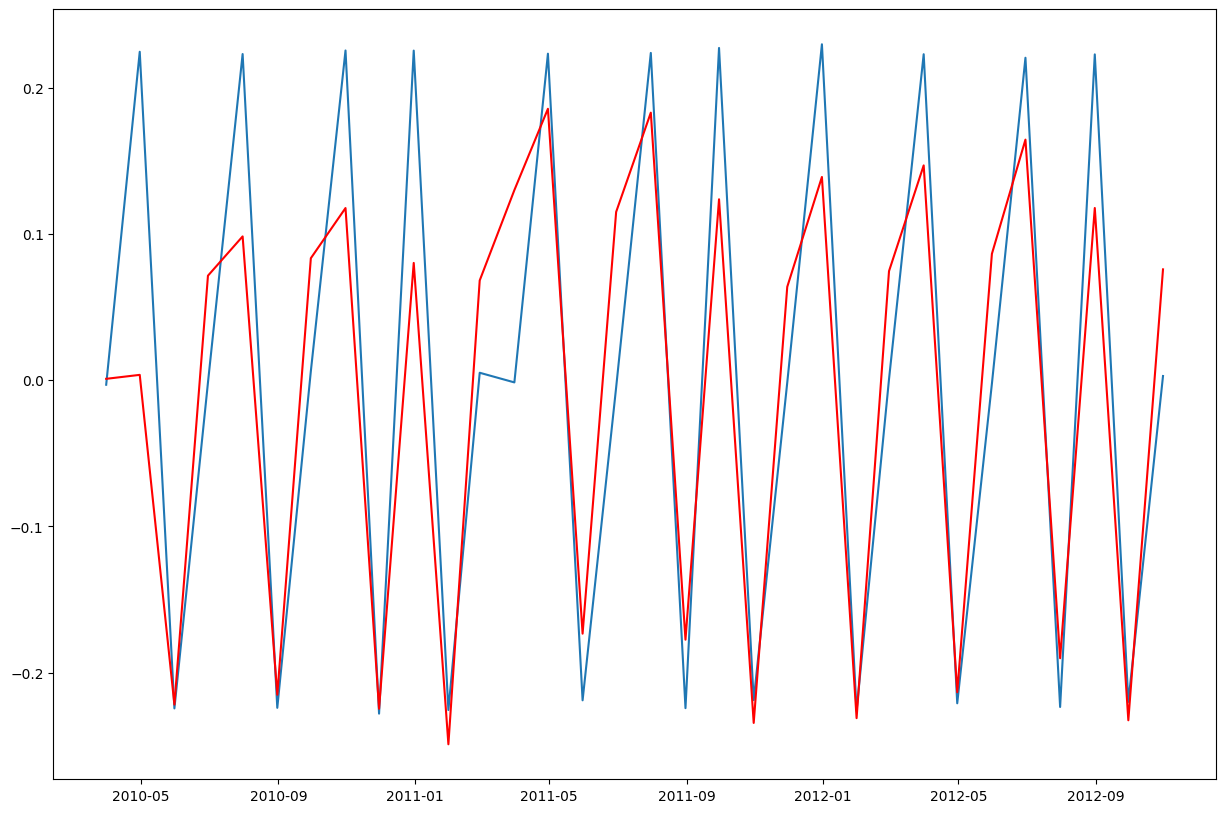

In [52]:
plt.figure(figsize=(15,10))
plt.plot(y_log_diff)
plt.plot(model_fit.predict(), color = 'red') 

In [37]:
p=0
d=0
q=2
#y_log_diff = y_log.diff().dropna()
model = ARIMA(y_log_diff, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=12)

C:\Users\MITHUNA\AppData\Local\Temp\ipykernel_16576\1201600881.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.plot(y_log_diff['Oct 2012'].append(forecast.predicted_mean), color='red', label='Forecast')


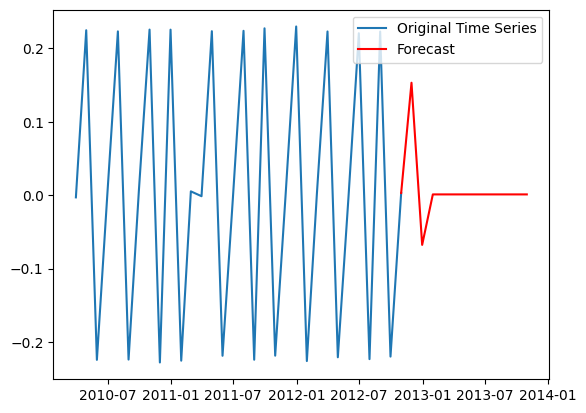

In [40]:
forecast_steps = 12
plt.plot(y_log_diff, label='Original Time Series')
plt.plot(y_log_diff['Oct 2012'].append(forecast.predicted_mean), color='red', label='Forecast')
plt.legend()
plt.show()

The model has made quite good predictions. Sales seem to increase during June,November and December of every year.
It kind of remains average during other times of the year.

# Regression Analysis

In [41]:
retail_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


In [42]:
retail_data.columns

Index(['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'AvgWeeklySalesperStore',
       'AverageMonthlySales', 'Store', 'Dept', 'IsHoliday_x', 'IsHoliday_y',
       'Type_A', 'Type_B', 'Type_C', 'AvgWeeklySalesperDept'],
      dtype='object')

In [44]:
retail_data.shape

(421570, 22)

In [45]:
# Defining the dependent variable 
y = retail_data["AvgWeeklySalesperDept"]

In [46]:
# Defining the independent variable 
x = retail_data.drop(['AvgWeeklySalesperDept'],axis=1)

In [47]:
from sklearn.model_selection import train_test_split 

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=123)

# Random forest 

In [49]:
from sklearn.ensemble import RandomForestRegressor 

In [50]:
regressor = RandomForestRegressor()

In [51]:
model = regressor.fit(x_train,y_train)

In [52]:
# Training data score
model.score(x_train,y_train)

0.9999427382605496

In [53]:
y_pred = model.predict(x_test)
y_pred 

array([ 4747.85618777,  4651.7296582 ,  4118.19720847, ...,
       44900.70272727,  4651.7296582 , 10187.1204975 ])

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mse = mean_squared_error(y_test,y_pred)
print("RMSE is " , np.sqrt(mse))

RMSE is  366.99109647636476


Text(0, 0.5, 'Predicted Sales per Dept')

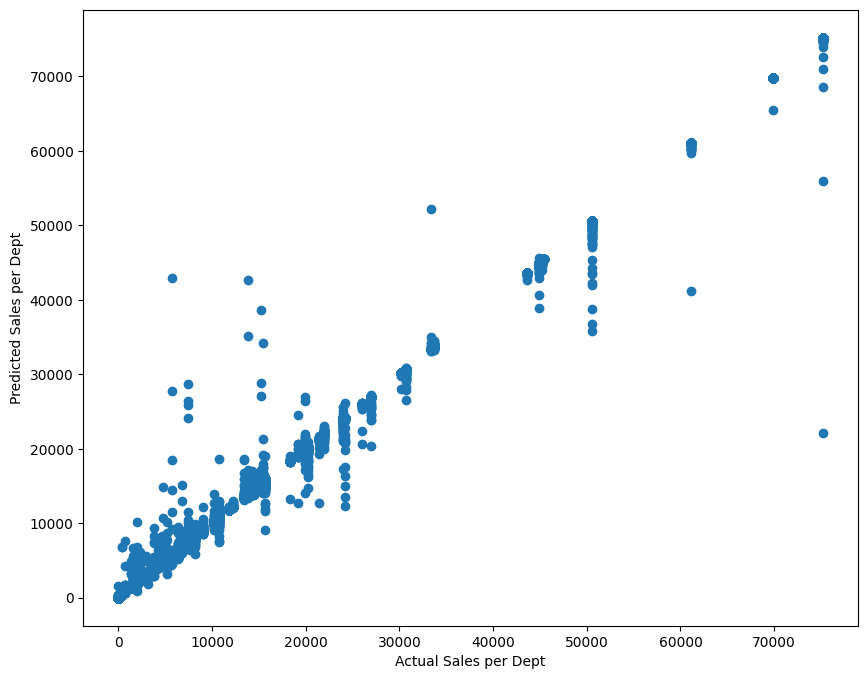

In [59]:
# Correlation between actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales per Dept')
plt.ylabel('Predicted Sales per Dept')

It is found that there is a good correlation between the values using Random Forest algorithm 

## Linear Regression 

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear = LinearRegression()
model = linear.fit(x_train,y_train)
model.score(x_train,y_train)

0.6328655186287862

In [63]:
y_pred = model.predict(x_test)
y_pred

array([ 3453.8528345 , 13509.33263263, 11608.31411048, ...,
       26807.3514337 ,  5624.16220869, 14080.76455165])

In [64]:
from sklearn.metrics import r2_score

In [65]:
r_2 = r2_score(y_test,y_pred)
print("R^2 is ", r_2)
mse = mean_squared_error(y_test,y_pred)
print("RMSE is ", np.sqrt(mse))

R^2 is  0.6207937337208445
RMSE is  10248.739776150283


R^2 is only 0.62 which implies that the model can predict only 60% of the data and the remaining 40% cannot be predicted. 
RMSE is also higher than the RMSE of random forest model.

Text(0, 0.5, 'Predicted sales per dept')

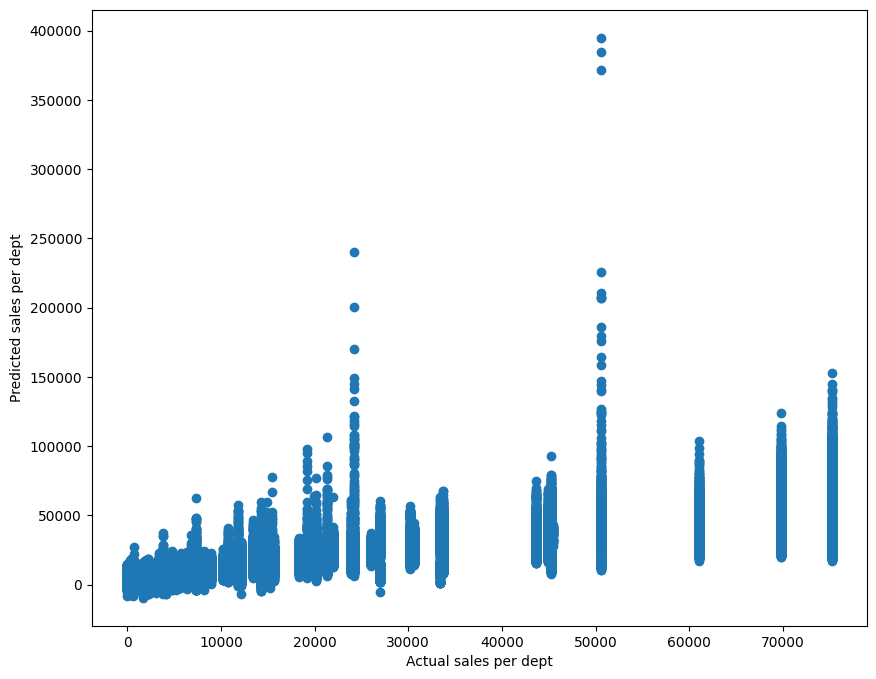

In [67]:
# Correlation between actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales per dept')
plt.ylabel('Predicted sales per dept')

From the above graph, linear regression doesn't fit the data as there is no correlation between the actual and predicted values.